# Baltimore homicides

The tragic shooting in Orlando has gotten a lot of people, myself included, thinking about gun violence.  

I wondered what could be learned about gun violence from available public data.  I looked around a bit and found an index of public crime datasets:  http://us-city.census.okfn.org/dataset/crime-stats.  One city with a 100% score is Baltimore, the site of the greatest TV seires of all time The Wire.  The investigators on that show often cracked cases with the help of data science:  McNulty identified a geographical pattern of dead bodies that helped lead to an organized drug trafficking ring (Season 2); Freamon and Pryzbylewski pored through public housing records to figure out that drug dealers were also looking to make money in the real estate market (Season 3).  

On the Open Baltimore website (https://data.baltimorecity.gov) I found a database of crimes since 2013:  https://data.baltimorecity.gov/Public-Safety/Crimes-to-date-in-2013/3h27-ehp2.  I filtered out only those crimes designated as "HOMICIDE" and exported the results as a csv file.  





## Setup

In [4]:
import os
import sys
import argparse
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline  

# Plot style
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)


/Users/hwwulsin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
hom = pd.read_csv('homicides.csv')

In [7]:
hom.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,crimeCaseNumber
0,6/11/16,1541,1F,0 SHIPLEY ST,HOMICIDE,FIREARM,842,SOUTHWESTERN,Shipley Hill,"(39.2877000000, -76.6581800000)",NaN
1,6/11/16,133,1F,900 PENNSYLVANIA AV,HOMICIDE,FIREARM,121,CENTRAL,Heritage Crossing,"(39.2969200000, -76.6265300000)",NaN
2,6/10/16,2340,1F,400 E 22ND ST,HOMICIDE,FIREARM,341,EASTERN,Barclay,"(39.3145100000, -76.6104700000)",NaN
3,6/10/16,1938,1F,2500 KEYWORTH AV,HOMICIDE,FIREARM,533,NORTHERN,Greenspring,"(39.3346700000, -76.6594000000)",NaN
4,6/9/16,1636,1F,1900 EDMONDSON AV,HOMICIDE,FIREARM,722,WESTERN,Midtown-Edmondson,"(39.2951000000, -76.6480100000)",NaN


## How does the homicide rate vary over time?  

In [15]:
hom.index = pd.to_datetime(hom['CrimeDate'])

In [18]:
hom.index

DatetimeIndex(['2016-06-11', '2016-06-11', '2016-06-10', '2016-06-10',
               '2016-06-09', '2016-06-09', '2016-06-08', '2016-06-08',
               '2016-06-06', '2016-06-06',
               ...
               '2013-01-22', '2013-01-18', '2013-01-16', '2013-01-15',
               '2013-01-13', '2013-01-12', '2013-01-11', '2013-01-11',
               '2013-01-11', '2013-01-03'],
              dtype='datetime64[ns]', name=u'CrimeDate', length=913, freq=None)

In [21]:
hom.index.weekday
# Determine that 0 is a Monday by checking a calendar  

array([5, 5, 4, 4, 3, 3, 2, 2, 0, 0, 5, 4, 4, 1, 5, 4, 4, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 0, 0, 0, 4, 1, 3, 1, 6, 5, 4, 2, 1, 0, 3, 3, 3, 2, 1, 1, 1,
       0, 0, 0, 6, 6, 4, 1, 1, 0, 6, 5, 1, 1, 0, 0, 4, 4, 4, 3, 2, 6, 3, 2,
       1, 6, 3, 1, 1, 5, 4, 4, 3, 2, 1, 6, 5, 3, 6, 3, 0, 0, 4, 3, 1, 6, 6,
       6, 5, 5, 4, 3, 2, 0, 4, 3, 2, 2, 0, 4, 4, 3, 2, 0, 4, 1, 1, 1, 0, 4,
       1, 0, 6, 3, 3, 3, 1, 4, 3, 2, 1, 0, 0, 0, 6, 5, 2, 6, 6, 6, 6, 4, 3,
       2, 2, 1, 0, 6, 4, 2, 6, 6, 6, 5, 4, 4, 3, 2, 2, 2, 1, 6, 5, 5, 4, 3,
       2, 0, 0, 0, 6, 5, 5, 5, 5, 5, 3, 0, 6, 6, 6, 5, 5, 3, 2, 2, 1, 1, 5,
       4, 1, 1, 0, 6, 6, 6, 5, 3, 3, 2, 2, 1, 5, 4, 4, 3, 3, 1, 0, 0, 6, 3,
       2, 2, 0, 6, 6, 5, 5, 4, 4, 4, 2, 2, 1, 0, 3, 2, 1, 0, 0, 5, 5, 4, 2,
       1, 1, 0, 6, 5, 4, 4, 4, 0, 4, 3, 3, 1, 1, 0, 6, 5, 4, 3, 3, 2, 2, 5,
       3, 3, 2, 2, 1, 1, 0, 6, 4, 3, 3, 3, 2, 0, 0, 6, 6, 6, 4, 3, 3, 3, 6,
       6, 5, 4, 4, 3, 2, 2, 1, 1, 0, 6, 6, 5, 4, 3, 3, 2, 1, 1, 1, 6, 2, 2,
       2, 0,

In [23]:
hom.loc[:,'weekday'] = hom.index.weekday

In [153]:
weekday_counts = hom.groupby('weekday').count()['CrimeDate']
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

Monday       126
Tuesday      142
Wednesday    108
Thursday     137
Friday       136
Saturday     124
Sunday       140
Name: CrimeDate, dtype: int64

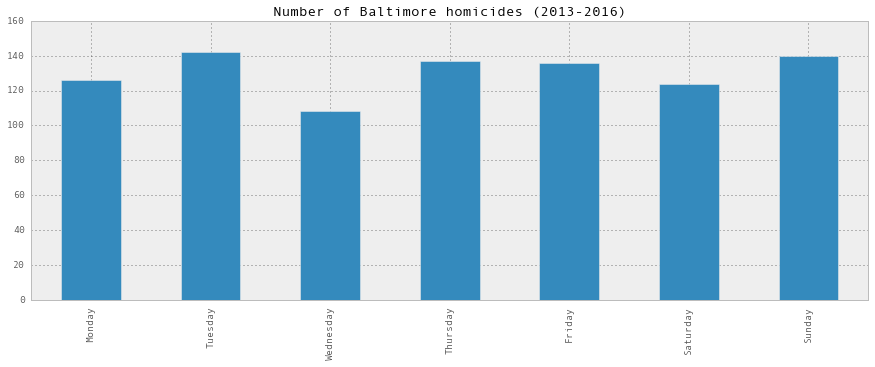

In [43]:
weekday_counts.plot(kind="bar", title='Number of Baltimore homicides (2013-2016)')

There is not a wide difference in homicide rates by weekday, which surprised me.  I would have expected more homicides on the weekends, but in fact Tuesday has the largest rate in this sample.  

In [44]:
hom.index.month

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  9,  9,  9,  9,
        9,  9,  9,  9,  9

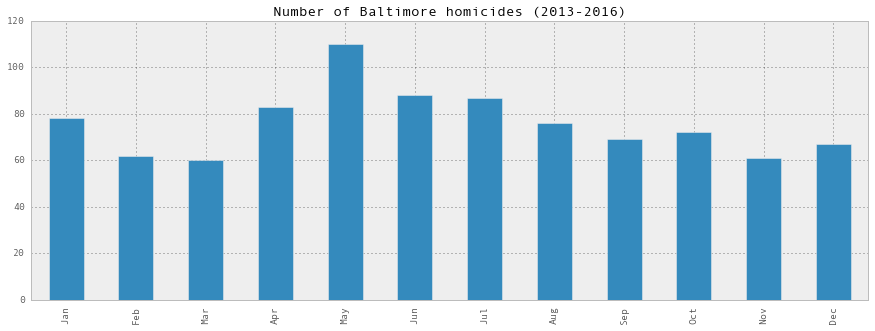

In [49]:
hom.loc[:,'month'] = hom.index.month
month_counts = hom.groupby('month').count()['CrimeDate']
month_counts.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_counts.plot(kind="bar", title='Number of Baltimore homicides (2013-2016)')

May had the most homicides of any month.  

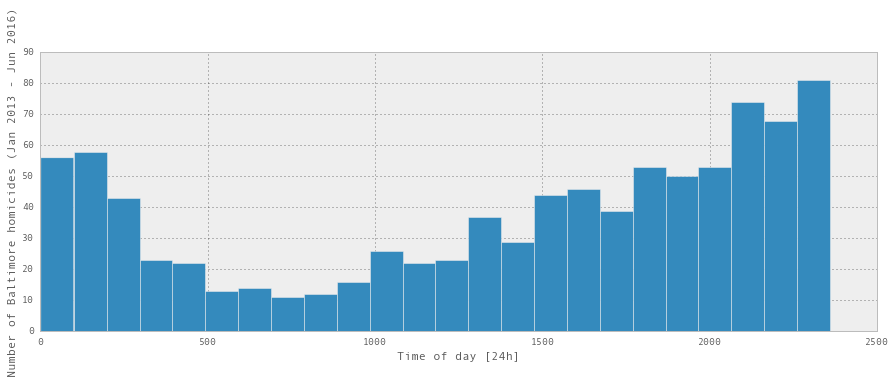

In [63]:
ax = hom['CrimeTime'].plot(kind='hist', bins=24)
ax.set_xlabel("Time of day [24h]")
ax.set_ylabel("Number of Baltimore homicides (Jan 2013 - Jun 2016)")


The time when the most homicides occur is between 9pm (21h) and midnight.  The fewest homicides occur between 5-10am.  This is roughly as I would have expected.  

In [71]:
monthHistory = hom.groupby(pd.TimeGrouper(freq='M')).count()
monthHistory.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,crimeCaseNumber,weekday,month
CrimeDate,,,,,,,,,,,,,
2013-01-31,14,14,14,14,14,14,14,14,14,14,0,14,14
2013-02-28,15,15,15,15,15,15,15,15,15,15,0,15,15
2013-03-31,20,20,20,20,20,20,20,20,20,20,0,20,20
2013-04-30,20,20,20,20,20,20,20,20,20,20,0,20,20
2013-05-31,20,20,20,20,20,20,20,20,20,20,0,20,20


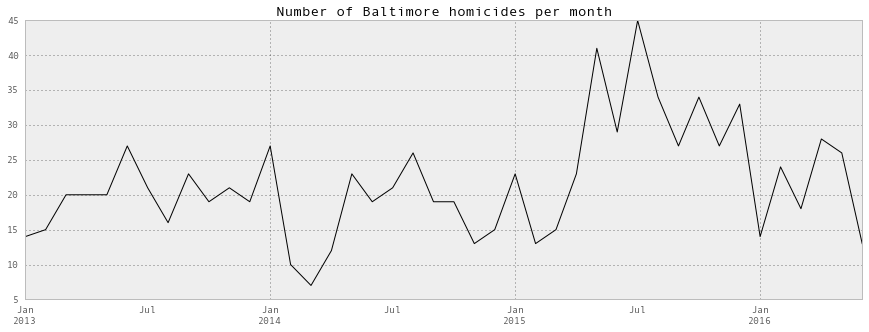

In [98]:
#plt.figure(); 
ax = monthHistory['CrimeDate'].plot(style='k-', title="Number of Baltimore homicides per month")
#ax = monthHistory['CrimeDate'].plot(kind='bar')
ax.set_xlabel("")
#ax.set_ylabel("Number of Baltimore homicides per month (Jan 2013 - Jun 2016)")

In [100]:
monthHistory['CrimeDate'].mean()

21.738095238095237

Since Jan 2013, there have been on average 22 homicides per month in Baltimore.  The deadliest month on record in the past 3 years was July 2015, during which there were 45 homicides in Baltimore - nearly as many as the 49 homicides in the Pulse nightclub shooting.  

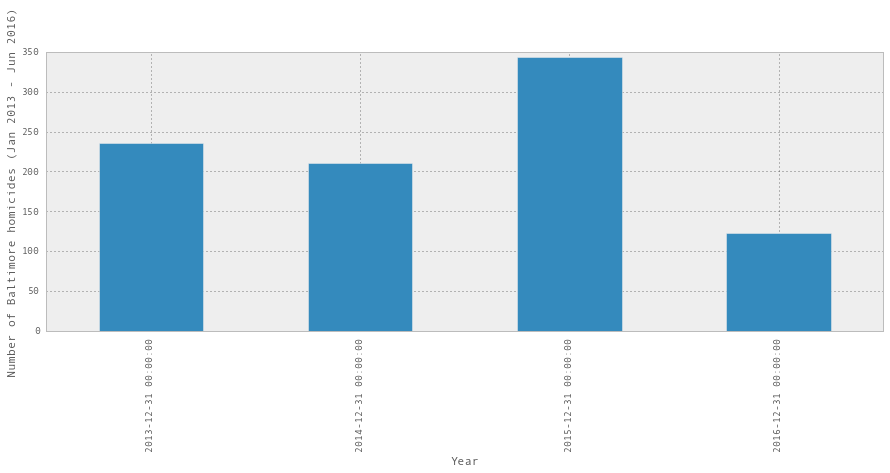

In [97]:
yearHistory = hom.groupby(pd.TimeGrouper(freq='A')).count()  # A is ofr end of year frequency; AS is for start of year
#yearHistory
ax = yearHistory['CrimeDate'].plot(kind='bar')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Baltimore homicides (Jan 2013 - Jun 2016)")


2015 had the highest homicide rate (344) in the last 3 years, with nearly a homicide per day on average. Note that there is only data from 2016 up to June, which explains why its count is lower than previous years.  

## What are the most common weapons used in homicides?

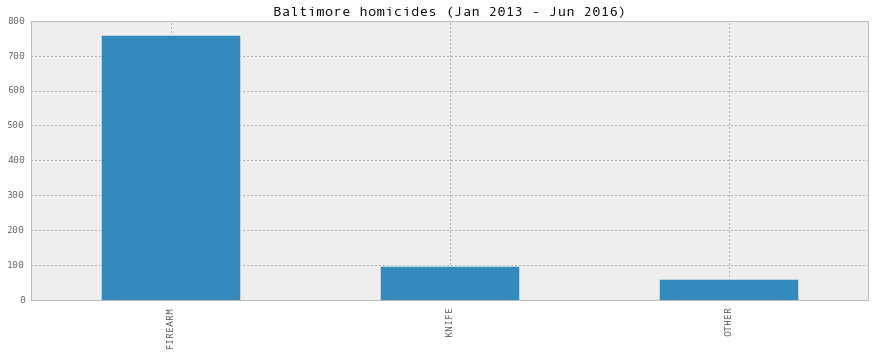

In [144]:
hom['Weapon'].value_counts().plot(kind='bar', title="Baltimore homicides (Jan 2013 - Jun 2016)")

In [107]:
len(hom.index)

913

In [142]:
hom['Weapon'].value_counts()

FIREARM    758
KNIFE       96
OTHER       59
Name: Weapon, dtype: int64

In [143]:
float(hom['Weapon'].value_counts()['FIREARM']) / len(hom.index)

0.8302300109529025

Firearms account for 83% of all homicides. 

## Where do homicides take place?

In [114]:
hom.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Location 1,crimeCaseNumber,weekday,month
CrimeDate,,,,,,,,,,,,,
2016-06-11,6/11/16,1541,1F,0 SHIPLEY ST,HOMICIDE,FIREARM,842,SOUTHWESTERN,Shipley Hill,"(39.2877000000, -76.6581800000)",NaN,5,6
2016-06-11,6/11/16,133,1F,900 PENNSYLVANIA AV,HOMICIDE,FIREARM,121,CENTRAL,Heritage Crossing,"(39.2969200000, -76.6265300000)",NaN,5,6
2016-06-10,6/10/16,2340,1F,400 E 22ND ST,HOMICIDE,FIREARM,341,EASTERN,Barclay,"(39.3145100000, -76.6104700000)",NaN,4,6
2016-06-10,6/10/16,1938,1F,2500 KEYWORTH AV,HOMICIDE,FIREARM,533,NORTHERN,Greenspring,"(39.3346700000, -76.6594000000)",NaN,4,6
2016-06-09,6/9/16,1636,1F,1900 EDMONDSON AV,HOMICIDE,FIREARM,722,WESTERN,Midtown-Edmondson,"(39.2951000000, -76.6480100000)",NaN,3,6


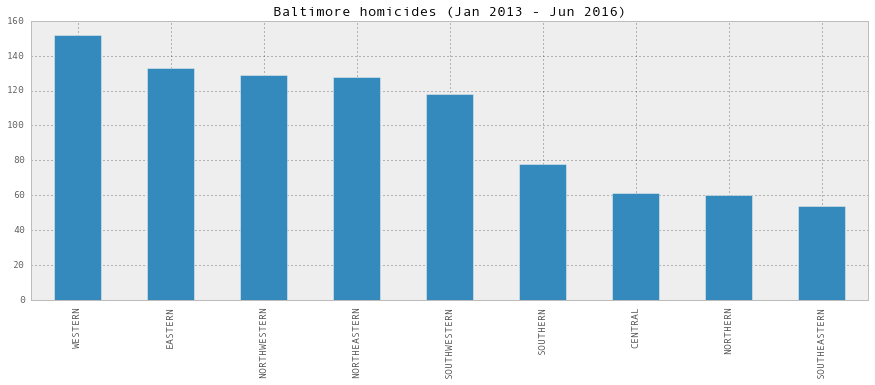

In [154]:
hom['District'].value_counts().plot(kind='bar', title="Baltimore homicides (Jan 2013 - Jun 2016)")

The Western district has the most homicides.  

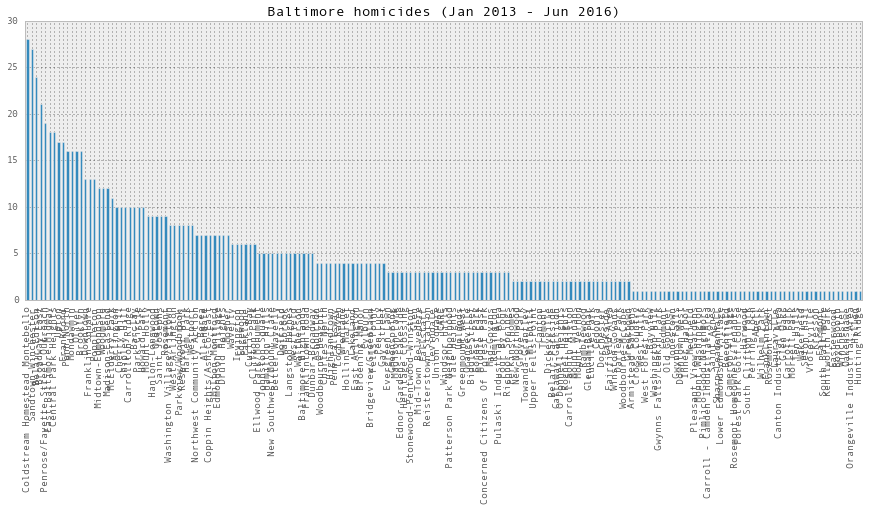

In [155]:
hom['Neighborhood'].value_counts().plot(kind='bar', title="Baltimore homicides (Jan 2013 - Jun 2016)")

This plot is hard to read.  Let's instead plot the top 10.

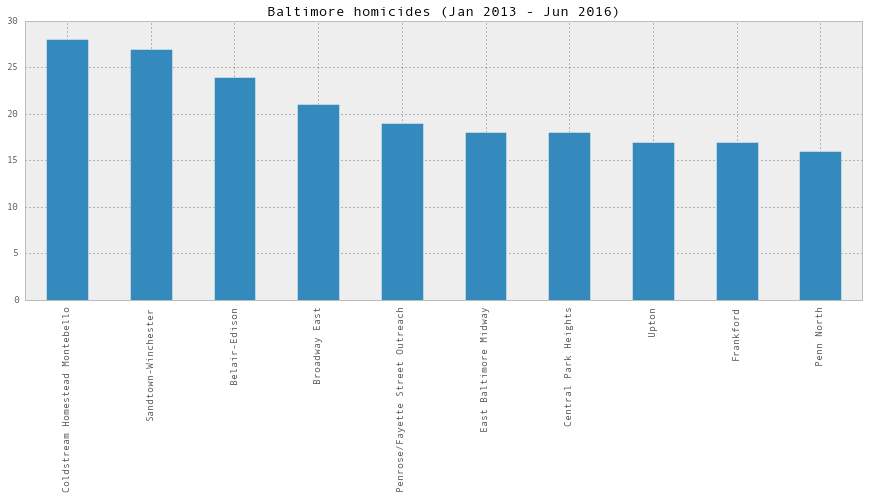

In [156]:
#neigh = hom.groupby('Neighborhood').count()
#neigh.sort('CrimeDate', ascending=0)['CrimeDate'][:10].plot(kind='bar', title="Baltimore homicides (Jan 2013 - Jun 2016)")
#hom.groupby('Neighborhood').count().sort('CrimeDate', ascending=0)['CrimeDate'][:10].plot(kind='bar', title="Baltimore homicides (Jan 2013 - Jun 2016)")
hom['Neighborhood'].value_counts()[:10].plot(kind='bar', title="Baltimore homicides (Jan 2013 - Jun 2016)")

In [157]:
hom['Location 1'].head()

CrimeDate
2016-06-11    (39.2877000000, -76.6581800000)
2016-06-11    (39.2969200000, -76.6265300000)
2016-06-10    (39.3145100000, -76.6104700000)
2016-06-10    (39.3346700000, -76.6594000000)
2016-06-09    (39.2951000000, -76.6480100000)
Name: Location 1, dtype: object

I confirmed that these are (latitude, longitude) coordinates by checking them on http://mynasadata.larc.nasa.gov/latitudelongitude-finder/. 
    

In [160]:
x, y = zip(*hom['Location 1'][:5])

ValueError: too many values to unpack

In [161]:
li = ([0,0], [1,1], [2,4], [3,9])
li

([0, 0], [1, 1], [2, 4], [3, 9])

In [162]:
x, y = zip(*li)

In [163]:
x

(0, 1, 2, 3)

In [164]:
y

(0, 1, 4, 9)

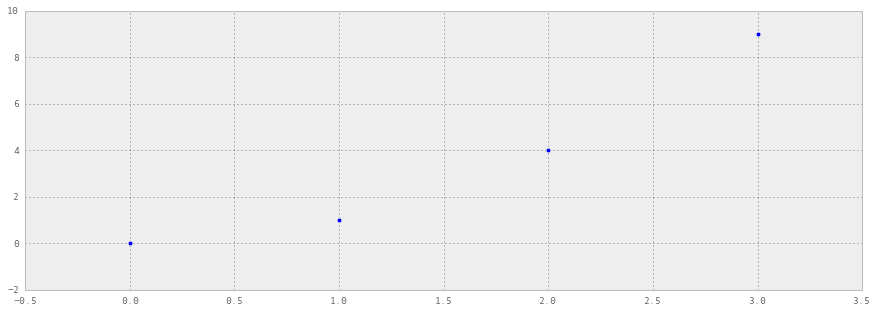

In [165]:
plt.scatter(*zip(*li))

In [183]:
hom['Location 1'].head()

CrimeDate
2016-06-11    (39.2877000000, -76.6581800000)
2016-06-11    (39.2969200000, -76.6265300000)
2016-06-10    (39.3145100000, -76.6104700000)
2016-06-10    (39.3346700000, -76.6594000000)
2016-06-09    (39.2951000000, -76.6480100000)
Name: Location 1, dtype: object

In [178]:
def getPair(s):  # Convert from string to ordered pair
    s = s.replace("(", "")
    s = s.replace(")", "")
    s = s.replace(" ", "")
    n = (s.split(",")[0], s.split(",")[1])
    return n

In [179]:
y = getPair("(39.2877000000, -76.6581800000)")
y

('39.2877000000', '-76.6581800000')

In [190]:
hom.loc[:,'LatLon'] = hom['Location 1'].apply(lambda x:  getPair(x)) # Create new column with ordered pair info.  
hom['LatLon'].head()

CrimeDate
2016-06-11    (39.2877000000, -76.6581800000)
2016-06-11    (39.2969200000, -76.6265300000)
2016-06-10    (39.3145100000, -76.6104700000)
2016-06-10    (39.3346700000, -76.6594000000)
2016-06-09    (39.2951000000, -76.6480100000)
Name: LatLon, dtype: object

In [184]:
x, y = zip(*hom['LatLon'][:5])

In [189]:
x

('39.2877000000',
 '39.2969200000',
 '39.3145100000',
 '39.3346700000',
 '39.2951000000')

In [186]:
y

('-76.6581800000',
 '-76.6265300000',
 '-76.6104700000',
 '-76.6594000000',
 '-76.6480100000')